In [ ]:
# Use Python 3.10 and this transformers==4.40.1 for stable compatibility
! pip install transformers==4.40.1

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM

In [2]:
# load model and dataset
model = AutoModelForCausalLM.from_pretrained('thuml/timer-base-84m', trust_remote_code=True)
df = pd.read_csv("https://raw.githubusercontent.com/WenWeiTHU/TimeSeriesDatasets/refs/heads/main/ETT-small/ETTh2.csv")

/Users/yong/miniconda3/envs/py310/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
A new version of the following files was downloaded from https://huggingface.co/thuml/timer-base-84m:
- configuration_timer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/thuml/timer-base-84m:
- ts_generation_mixin.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/thuml/timer-base-84m:
- modeling_timer.py
- ts_generation_mi

In [22]:
# perpare input
lookback_length = 48      # support the maximum context length up to 2880 
seqs = torch.tensor(df["OT"][:lookback_length]).unsqueeze(0).float()

In [24]:
if seqs.shape[-1] < 96:
    seqs = torch.cat([torch.zeros(seqs.shape[0], 96 - seqs.shape[-1]), seqs], dim=-1)

In [28]:
# generate forecast 
prediction_length = 48     # forecast the next 96 timestamps, supporting maximum prediction length encompassed in the context length
output = model.generate(seqs, max_new_tokens=prediction_length)

In [29]:
print(output.shape)

torch.Size([1, 48])


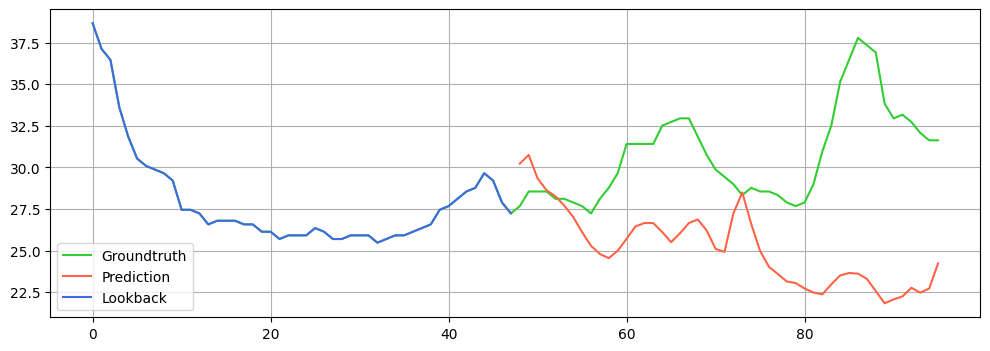

In [30]:
# plot the prediction

plt.figure(figsize=(12, 4))
plt.plot(df["OT"][:lookback_length + prediction_length], color="limegreen", label="Groundtruth")
plt.plot(range(lookback_length, lookback_length + prediction_length), output[0], color="tomato", label="Prediction")
plt.plot(df["OT"][:lookback_length], color="royalblue", label="Lookback")
plt.legend()
plt.grid()
plt.show()